In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import lightkurve as lk
from astropy import units as u

In [4]:
datalist = lk.search_lightcurvefile('KIC11615890')
data = datalist.download_all()

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


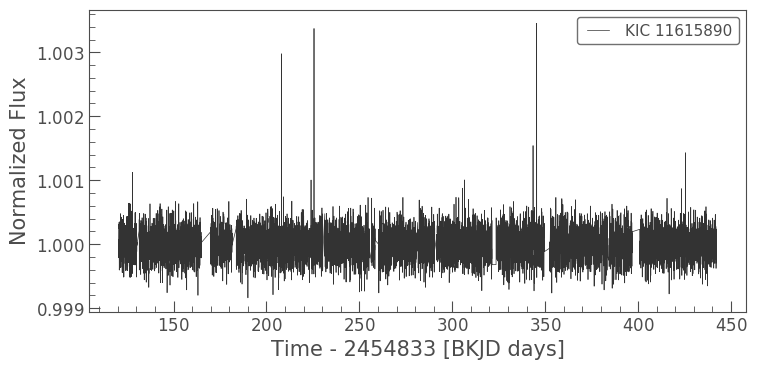

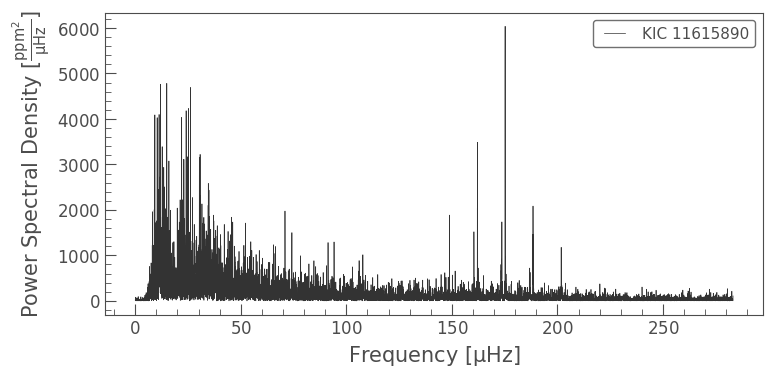

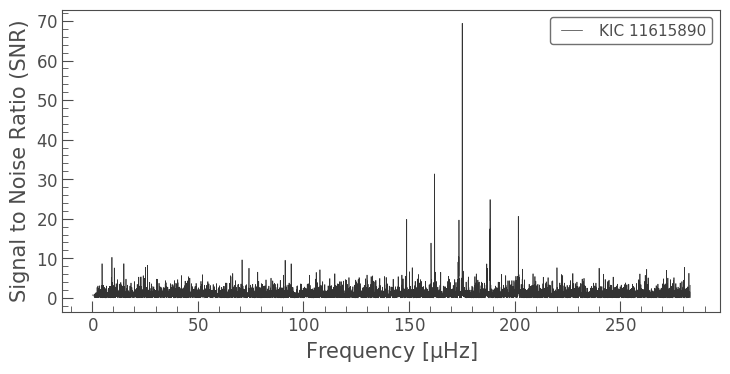

In [5]:
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data[0:5]: 
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
lc.plot()
pg = lc.to_periodogram(freq_unit = u.microhertz)
pg.plot()
snr = pg.flatten()
snr.plot()

In [9]:
from echelle import plot_echelle
dnu = 13.2
numax = 174.

In [11]:
plot_echelle(pg.frequency.value, pg.power.value, dnu, numax, 100., 250. )

ValueError: arange: cannot compute length